In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster, HeatMap

In [4]:
df= pd.read_csv('2018_Central_Park_Squirrel_Census_-_Squirrel_Data_20240909.csv')

In [5]:
df.head()

X          Y Unique Squirrel ID Hectare Shift      Date  \
0 -73.956134  40.794082     37F-PM-1014-03     37F    PM  10142018   
1 -73.968857  40.783783     21B-AM-1019-04     21B    AM  10192018   
2 -73.974281  40.775534     11B-PM-1014-08     11B    PM  10142018   
3 -73.959641  40.790313     32E-PM-1017-14     32E    PM  10172018   
4 -73.970268  40.776213     13E-AM-1017-05     13E    AM  10172018   

   Hectare Squirrel Number    Age Primary Fur Color Highlight Fur Color  ...  \
0                        3    NaN               NaN                 NaN  ...   
1                        4    NaN               NaN                 NaN  ...   
2                        8    NaN              Gray                 NaN  ...   
3                       14  Adult              Gray                 NaN  ...   
4                        5  Adult              Gray            Cinnamon  ...   

    Kuks  Quaas  Moans Tail flags Tail twitches  Approaches  Indifferent  \
0  False  False  False      False         False       False        False   
1  False  False  False      False         False       False        False   
2  False  False  False      False         False       False        False   
3  False  False  False      False         False       False        False   
4  False  False  False      False         False       False        False   

   Runs from  Other Interactions                                    Lat/Long  
0      False                 NaN  POINT (-73.9561344937861 40.7940823884086)  
1      False                 NaN  POINT (-73.9688574691102 40.7837825208444)  
2      False                 NaN  POINT (-73.97428114848522 40.775533619083)  
3       True                 NaN  POINT (-73.9596413903948 40.7903128889029)  
4      False                 NaN  POINT (-73.9702676472613 40.7762126854894)  

[5 rows x 31 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   X                                           3023 non-null   float64
 1   Y                                           3023 non-null   float64
 2   Unique Squirrel ID                          3023 non-null   object 
 3   Hectare                                     3023 non-null   object 
 4   Shift                                       3023 non-null   object 
 5   Date                                        3023 non-null   int64  
 6   Hectare Squirrel Number                     3023 non-null   int64  
 7   Age                                         2902 non-null   object 
 8   Primary Fur Color                           2968 non-null   object 
 9   Highlight Fur Color                         1937 non-null   object 
 10  Combination 

In [7]:
df['Date'] = pd.to_datetime(df['Date'], format= '%m%d%Y')

df= df.rename(columns={'X': 'Longitude', 'Y': 'Latitude'})

In [8]:
df['Longitude']

0      -73.956134
1      -73.968857
2      -73.974281
3      -73.959641
4      -73.970268
          ...    
3018   -73.963943
3019   -73.970402
3020   -73.966587
3021   -73.963994
3022   -73.975479
Name: Longitude, Length: 3023, dtype: float64

In [9]:
df = df.dropna(subset=['Latitude', 'Longitude'])

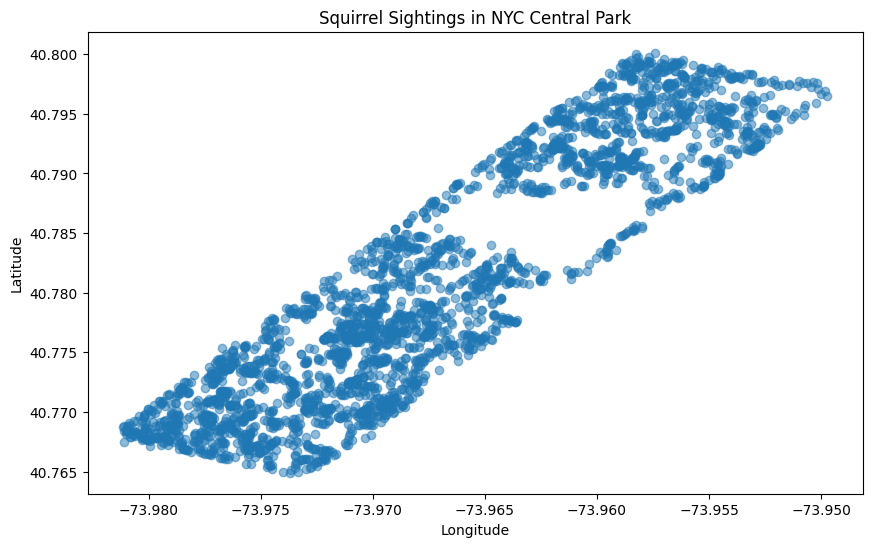

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5)
plt.title('Squirrel Sightings in NYC Central Park')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [11]:
center_lat = df['Latitude'].mean()
center_lon = df['Longitude'].mean()
nyc_map = folium.Map(location=[center_lat, center_lon], zoom_start=12)

for idx, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']]).add_to(nyc_map)


In [12]:
cluster_map = folium.Map(location=[center_lat, center_lon], zoom_start=12)
marker_cluster = MarkerCluster().add_to(cluster_map)

for idx, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']]).add_to(marker_cluster)

cluster_map

In [19]:
heat_map = folium.Map(location=[center_lat, center_lon], zoom_start=14)
heat_data = [[row['Latitude'], row['Longitude']] for idx, row in df.iterrows()]
HeatMap(heat_data).add_to(heat_map)

heat_map

In [20]:
color_map = folium.Map(location=[center_lat, center_lon], zoom_start=14)

color_dict = {'Gray': 'gray', 'Cinnamon': 'orange', 'Black': 'black'}

for idx, row in df.iterrows():
    color = color_dict.get(row['Primary Fur Color'], 'blue')  # Default to blue if color not found
    folium.CircleMarker(
        [row['Latitude'], row['Longitude']],
        radius=5,
        popup=row['Primary Fur Color'],
        color=color,
        fill=True,
        fillColor=color
    ).add_to(color_map)

color_map

In [21]:
color_map.save("nyc_squirrel_color_map.html")

In [16]:
south_threshold = 40.78

south_squirrels = df[df['Latitude'] < south_threshold]
south_count = len(south_squirrels)

print(f"Number of squirrels seen on the south of the park: {south_count}")

total_squirrels = len(df)
print(f"Total number of squirrels in the dataset: {total_squirrels}")

percentage = (south_count / total_squirrels) * 100
print(f"Percentage of squirrels in the south: {percentage:.2f}%")

Number of squirrels seen on the south of the park: 1660
Total number of squirrels in the dataset: 3023
Percentage of squirrels in the south: 54.91%


In [17]:

center_lat = df['Latitude'].mean()
center_lon = df['Longitude'].mean()
eating_map = folium.Map(location=[center_lat, center_lon], zoom_start=35)

marker_cluster = MarkerCluster().add_to(eating_map)

for idx, row in df.iterrows():
    # Determining color and popup text based on eating status
    if row['Eating']:
        color = 'red'
        popup_text = 'Eating'
    else:
        color = 'blue'
        popup_text = 'Not eating'

    # Creating a circle marker
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        popup=popup_text,
        color=color,
        fill=True,
        fillColor=color,
        fillOpacity=0.7
    ).add_to(marker_cluster)


legend_html = '''
<div style="position: fixed;
     bottom: 50px; left: 50px; width: 120px; height: 90px;
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color:white;
     ">&nbsp;<b>Legend</b><br>
     &nbsp;<i class="fa fa-circle fa-1x" style="color:red"></i>&nbsp;Eating<br>
     &nbsp;<i class="fa fa-circle fa-1x" style="color:blue"></i>&nbsp;Not eating
</div>
'''
eating_map.get_root().html.add_child(folium.Element(legend_html))

# Save the map
eating_map.save("squirrel_eating_map2.html")

print("Map has been created and saved as 'squirrel_eating_map.html'")

total_squirrels = len(df)
eating_squirrels = df['Eating'].sum()
print(f"Total number of squirrels: {total_squirrels}")
print(f"Number of squirrels eating: {eating_squirrels}")
print(f"Percentage of squirrels eating: {(eating_squirrels/total_squirrels)*100:.2f}%")

Map has been created and saved as 'squirrel_eating_map.html'
Total number of squirrels: 3023
Number of squirrels eating: 760
Percentage of squirrels eating: 25.14%
